In [8]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
# read pickle file
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [10]:
ball_positions = [x.get(1, []) for x in ball_positions] # list of bounding boxes which is an empty list when there are no detections
df_ball_positions = pd.DataFrame(ball_positions, columns=['x1','y1','x2','y2']) # converts list to pandas dataframe

# interpolate missing values
df_ball_positions = df_ball_positions.interpolate() # does not interpolate numbers in beginning so need to make sure 
df_ball_positions = df_ball_positions.bfill()

ball_positions = [{1:x} for x in df_ball_positions.to_numpy().tolist()]

In [13]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2']) / 2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()

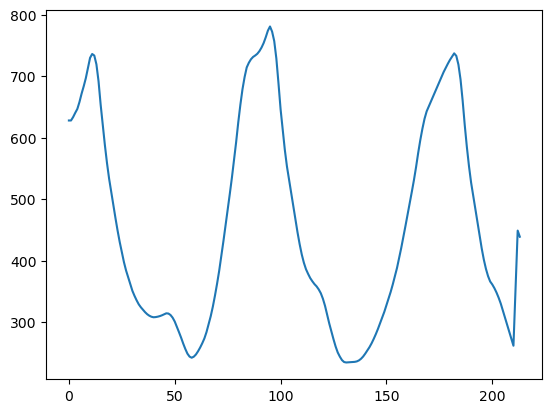

In [14]:
# plot the mid_y_rolling_mean
plt.plot(df_ball_positions['mid_y_rolling_mean'])

In [15]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

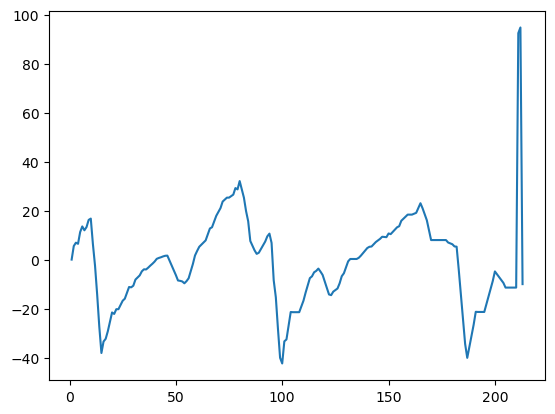

In [16]:
plt.plot(df_ball_positions['delta_y'])

In [17]:
df_ball_positions['ball_hit'] = 0

In [ ]:
minimum_change_frames_for_hit = 25
for i in range(1, len(df_ball_positions) - int(minimum_change_frames_for_hit*1.2)):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i+1] < 0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i+1] > 0

    if negative_position_change or positive_position_change:
        change_count = 0
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit*1.2) + 1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i+1] < 0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i+1] > 0

        

# Tennis Analysis project

In this project I train the YOLO model to detect players and tennis balls on the court to make useful match analyses.
I first trained the YOLOv11 model on multiple roboflow datasets with the tennis ball annotated to make the model see the fast moving ball better

<img src="media.videoEx.gif" alt="Description of the GIF" width="600">